In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import linregress

In [2]:
DATA_PATH = "../wepanic_collated_catalogue.csv"
wepanic_data = pd.read_csv(DATA_PATH)
#wepanic_data = wepanic_data.drop('Unna
wepanic_data

,Unnamed: 0,SUBJECT,TRIAL,FRAME_PTH,HEART_RATE_BPM,RESP_RATE_BR_PM,GOOD
0,0,1.0,1,frames/S0001/Trial1_frames,64.0,34.0,0
1,1,1.0,2,frames/S0001/Trial2_frames,88.0,48.0,0
2,2,2.0,1,frames/S0002/Trial1_frames,100.0,20.0,1
3,3,2.0,2,frames/S0002/Trial2_frames,128.0,26.0,1
4,4,3.0,1,frames/S0003/Trial1_frames,60.0,20.0,0
5,5,3.0,2,frames/S0003/Trial2_frames,90.0,24.0,0
6,6,4.0,1,frames/S0004/Trial1_frames,56.0,10.0,1
7,7,4.0,2,frames/S0004/Trial2_frames,72.0,18.0,1
8,8,5.0,1,frames/S0005/Trial1_frames,70.0,16.0,0
9,9,5.0,2,frames/S0005/Trial2_frames,76.0,24.0,0


### data spread and distributions

In [3]:
hrates = wepanic_data['HEART_RATE_BPM'].values.tolist()
resp_rates = wepanic_data['RESP_RATE_BR_PM'].values.tolist()

useable = wepanic_data[wepanic_data['GOOD'] == 1]
hrates_u = useable['HEART_RATE_BPM'].values.tolist()
resp_rates_u = useable['RESP_RATE_BR_PM'].values.tolist()

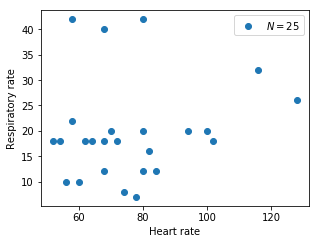

In [4]:
a = 0.75
fig, ax  = plt.subplots(1, figsize=(6.4*a, 4.8*a))

ax.scatter(hrates_u, resp_rates_u, label="$N=%d$" % len(hrates_u))
ax.set_xlabel('Heart rate')
ax.set_ylabel('Respiratory rate')

ax.legend()
plt.savefig('figs/hrate_resprate_spread.png')
plt.show()

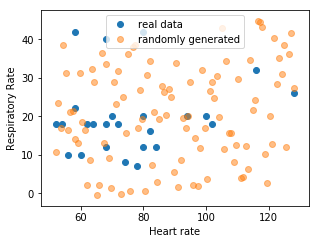

In [5]:
fig, ax = plt.subplots(1, figsize=(6.4*a, 4.8*a))

ax.scatter(hrates_u, resp_rates_u, label="real data")

min_resp, max_resp = min(resp_rates_u), max(resp_rates_u)
min_hrate, max_hrate = min(hrates_u), max(hrates_u)

slope, intercept, r_value, p_value, std_err = linregress(hrates_u, resp_rates_u)

def linear(x):
    return slope*x + intercept

X = np.linspace(min_hrate, max_hrate, 100)
#Y = np.linspace(min_resp, max_resp, 100)

#X = [linear(x) + random.uniform(-np.std(X), np.std(X)) for x in X]
#Y = [linear(y) + random.uniform(-np.std(Y), np.std(Y)) for y in Y]
Y = [linear(x) + random.uniform(-np.std(X), np.std(X)) for x in X]

ax.scatter(X, Y, label='randomly generated', alpha=0.5)

ax.set_xlabel('Heart rate')
ax.set_ylabel('Respiratory Rate')

ax.legend()
plt.savefig('figs/hrate_resprate_spread_withfill.png')
plt.show()

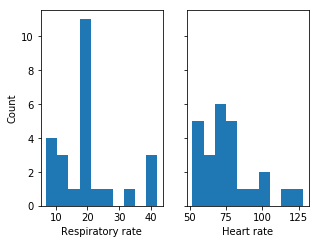

In [9]:
fig, axarr = plt.subplots(1, 2, figsize=(6.4*a, 4.8*a), sharey=True)
n, _, _ = axarr[0].hist(resp_rates_u)
n2, _, _ = axarr[1].hist(hrates_u)

axarr[0].set_ylabel('Count')
axarr[0].set_xlabel('Respiratory rate')
axarr[1].set_xlabel('Heart rate')
plt.savefig('figs/hrate_resprate_counts.png')
plt.show()

## k-fold experimentation
* Added stipulations: no subject repetitions in train vs. test

In [ ]:
subject_set = list(set(useable['SUBJECT'].values.tolist()))
n_train = int(0.8*len(subject_set))
n_val = len(subject_set) - n_train
print('got %d distinct subjects in the set of good clips' % len(subject_set))
print('--- %2d samples for training' % n_train)
print('--- %2d samples for validation' % n_val)

In [ ]:
import random

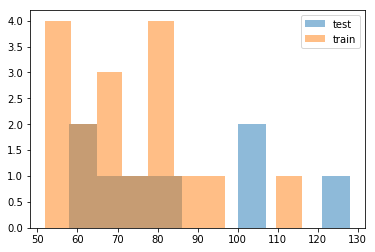

In [7]:
def fold(df, k=4):
    
    uniques = list(set(df['SUBJECT'].values.tolist()))
    n_val = int(np.ceil(len(uniques)/k))
    
    n_train = len(uniques) - n_val
    #n_val = len(uniques) - n_train
    
    validated = []
    
    i = 0
    while i < k:
        
        train = validated  + random.sample(uniques, n_train)
        val = list(set(uniques) - set(train))
                
        train_df = df[df['SUBJECT'].isin(train)]
        val_df = df[df['SUBJECT'].isin(val)]
        
        i += 1
        validated.extend(val)
        uniques = list(set(uniques) - set(validated))
                                
        yield train_df.drop('Unnamed: 0', axis=1), val_df.drop('Unnamed: 0', axis=1)

        
train_df, val_df = next(fold(useable))

plt.hist(val_df.HEART_RATE_BPM.values.tolist(), alpha=0.5, label='test')
plt.hist(train_df.HEART_RATE_BPM.values.tolist(), alpha=0.5, label='train')
plt.legend()
plt.show()

In [ ]:
val_df

In [ ]:
14/4

In [ ]:
print('respiratory rate: mean={}, std={}'.format(useable['RESP_RATE_BR_PM'].mean(),
                                                 useable['RESP_RATE_BR_PM'].std()))

print('heart rate: mean={}, std={}'.format(useable['HEART_RATE_BPM'].mean(),
                                           useable['HEART_RATE_BPM'].std()))

resp_rates_u_norm = np.array(resp_rates_u) / np.mean(resp_rates_u)
hrates_u_norm = np.array(hrates_u) / np.mean(hrates_u)

print('respiratory rate, normalized: std={}'.format(np.std(resp_rates_u_norm)))
print('heart rate, normalized: std={}'.format(np.std(hrates_u_norm)))